In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Sample JSON input
data = [
    {
        "title": "Samsung Galaxy A16 5G",
        "tags": ["phone", "Samsung", "5G", "prepaid", "promotion", "out-of-stock"],
        "content_type": "product_listing",
        "source_url": "https://www.straighttalk.com/shop/all-phones",
        "availability": "out_of_stock",
        "description": "The Samsung Galaxy A16 5G might be available as a promotional offer with select plans, such as a Gold Unlimited Plan or higher. In some cases, this device has been offered for free when bundled with qualifying plans. The full retail price appears to be approximately $99.99. Pricing through financing options like Smartpay may vary depending on credit.",
        "review_summary": "This product currently appears to have no customer reviews. It is likely that further customer feedback could provide more insight into the device's performance and reliability."
    },
    {
        "title": "moto g power 5G - 2024",
        "tags": ["phone", "Motorola", "5G", "prepaid", "promotion", "out-of-stock"],
        "content_type": "product_listing",
        "source_url": "https://www.straighttalk.com/shop/all-phones",
        "availability": "out_of_stock",
        "description": "The 2024 moto g power 5G may have been offered at a discounted price—possibly reduced from $149.99 to $99.99. Customers with excellent credit might be eligible for monthly payments through Smartpay over a 24-month term. Free availability might apply when bundled with higher-tier plans.",
        "review_summary": "There are currently no reviews for this model, suggesting limited customer feedback so far."
    },
    {
        "title": "moto g play - 2024",
        "tags": ["phone", "Motorola", "prepaid", "promotion", "budget", "out-of-stock"],
        "content_type": "product_listing",
        "source_url": "https://www.straighttalk.com/shop/all-phones",
        "availability": "out_of_stock",
        "description": "This device may have been reduced in price from around $39.99 to $29.99, making it one of the more affordable models. Payment plans might be available depending on credit status. Promotional offers could apply in combination with select monthly plans.",
        "review_summary": "This product currently lacks customer reviews, which could indicate it's newly listed or hasn't been widely purchased yet."
    }
]


In [2]:

# Create the graph
G = nx.DiGraph()

for item in data:
    product = item["title"]
    G.add_node(product, type="Product")
    
    # Tags as relationships
    for tag in item["tags"]:
        G.add_node(tag, type="Tag")
        G.add_edge(product, tag, relation="has_tag")
    
    # Availability
    availability = item["availability"]
    G.add_node(availability, type="Availability")
    G.add_edge(product, availability, relation="has_availability")
    
    # Source
    source = item["source_url"]
    G.add_node(source, type="SourceURL")
    G.add_edge(product, source, relation="available_at")
    
    # Extract brand (simple heuristic from tags)
    brands = ["Samsung", "Motorola"]
    for brand in brands:
        if brand in item["tags"]:
            G.add_node(brand, type="Brand")
            G.add_edge(product, brand, relation="has_brand")

    # Extract prices from description (very basic regex)
    import re
    prices = re.findall(r"\$\d+(?:\.\d{2})?", item["description"])
    for price in prices:
        G.add_node(price, type="Price")
        G.add_edge(product, price, relation="mentioned_price")
    
    # Plan mentions
    plans = re.findall(r"(?i)(Gold Unlimited Plan|higher-tier plans|monthly plans|select plans)", item["description"])
    for plan in plans:
        G.add_node(plan, type="Plan")
        G.add_edge(product, plan, relation="offered_with")



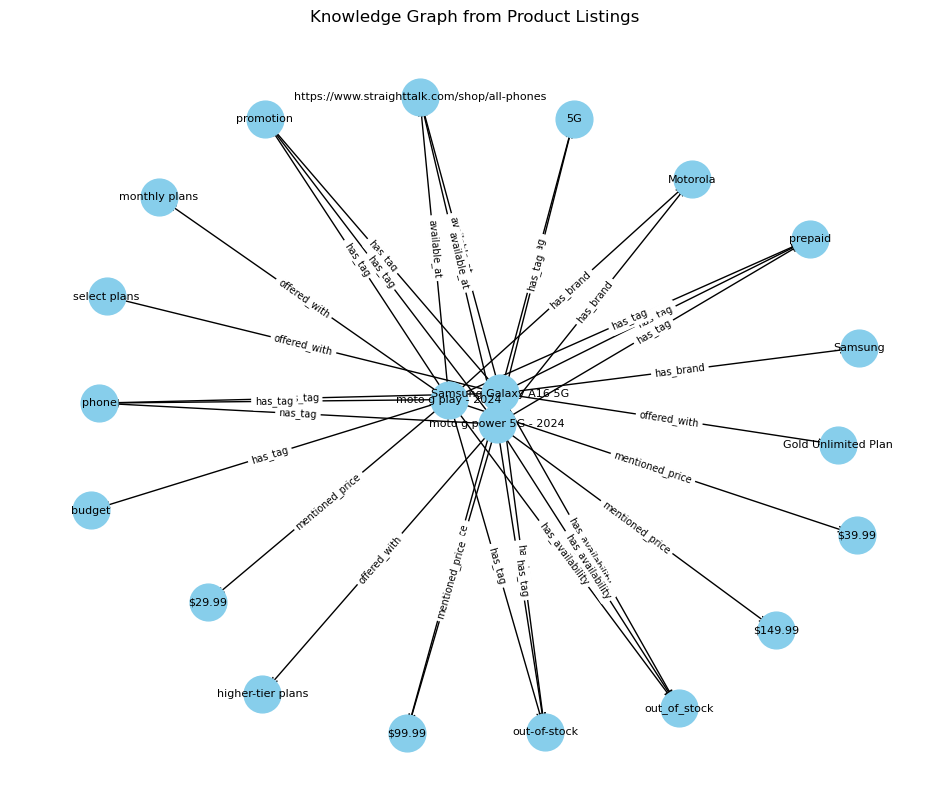

In [3]:
# Visualize the graph
pos = nx.spring_layout(G, k=0.6, iterations=50)
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=10)
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")

edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

plt.title("Knowledge Graph from Product Listings")
plt.axis('off')
plt.show()